In [275]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd

In [276]:
os.chdir('C:/LocalData/github/titanic')

In [277]:
df_train_raw = pd.read_csv(r'csv/train.csv')
df_test_raw = pd.read_csv(r'csv/test.csv')

# Getting an overview over the data

In [278]:
df_train

,Survived,Pclass,female,male,Fare
0,0,3,0,1,1
1,1,1,1,0,1
2,1,3,1,0,1
3,1,1,1,0,1
4,0,3,0,1,1
5,0,3,0,1,1
6,0,1,0,1,1
7,0,3,0,1,1
8,1,3,1,0,1
9,1,2,1,0,1


In [279]:
df_train_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [280]:
df_test_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 39.2+ KB


In [281]:
df_train_raw['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [282]:
df_train_raw['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [283]:
df_train_raw['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [284]:
df_train_raw['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [285]:
df_train_raw.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

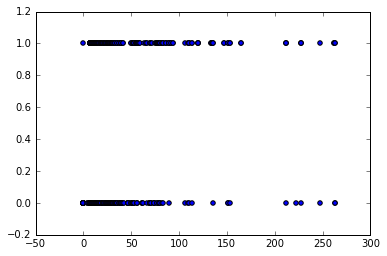

In [286]:
df_sorted = df_train_raw.sort_values('Fare')
df_sorted = df_sorted[df_sorted.Fare<300]
n = 1024
X = df_sorted['Fare']
Y = df_sorted['Survived']

plt.scatter(X,Y)

# Create dataframe for analysis

In [287]:
df_train = pd.DataFrame(df_train_raw['Survived']).astype(float)
df_train = df_train.join(df_train_raw['Pclass']).astype(float)
df_train = df_train.join(pd.get_dummies(df_train_raw['Sex']))
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
Survived    891 non-null float64
Pclass      891 non-null float64
female      891 non-null float64
male        891 non-null float64
dtypes: float64(4)
memory usage: 34.8 KB


In [288]:
def raw2final(df_raw,train_or_test = 'train'):
    "Edit the dataframe from raw to analysis format"
    #Add Pclass and Survived (only for train data)
    if train_or_test == 'train':
        df = pd.DataFrame(df_raw['Survived']).astype(float)
        df = df.join(df_raw['Pclass']).astype(float)
    else:
        df = pd.DataFrame(df_raw['Pclass']).astype(float)      
    #Add Sex
    df = df.join(pd.get_dummies(df_raw['Sex']))
    
    #Add Fare
    fare = df_raw['Fare'].fillna(0)
    nbins = 5
    bin_ranges = np.linspace(fare.min()-1, fare.max(), nbins+1)
    df['Fare'] =  pd.cut(fare, bin_ranges,labels=range(1,nbins+1)).astype(float)

    return df

df_train = raw2final(df_train_raw)
df_test = raw2final(df_test_raw,'test')

df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 5 columns):
Survived    891 non-null float64
Pclass      891 non-null float64
female      891 non-null float64
male        891 non-null float64
Fare        891 non-null float64
dtypes: float64(5)
memory usage: 41.8 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 4 columns):
Pclass    418 non-null float64
female    418 non-null float64
male      418 non-null float64
Fare      418 non-null float64
dtypes: float64(4)
memory usage: 16.3 KB


# Make Pandas Dataframe into Numpy Array for plugging into scikitlearn

In [289]:
m_train = df_train.as_matrix()
m_test = df_test.as_matrix()

# Run Machine Learning

In [290]:
# Import the random forest package
from sklearn.ensemble import RandomForestClassifier 

# Create the random forest object which will include all the parameters
# for the fit
forest = RandomForestClassifier(n_estimators = 100)

In [291]:
# Fit the training data to the Survived labels and create the decision trees
forest = forest.fit(m_train[0::,1::],m_train[0::,0])

In [292]:
# Take the same decision trees and run it on the test data
output = forest.predict(m_test)

In [293]:
df_prediction = pd.DataFrame(df_test_raw['PassengerId'])
df_prediction['Survived'] = output.astype(int)

In [294]:
print df_prediction

     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
5            897         0
6            898         1
7            899         0
8            900         1
9            901         0
10           902         0
11           903         0
12           904         1
13           905         0
14           906         1
15           907         1
16           908         0
17           909         0
18           910         1
19           911         1
20           912         0
21           913         0
22           914         1
23           915         0
24           916         1
25           917         0
26           918         1
27           919         0
28           920         0
29           921         0
..           ...       ...
388         1280         0
389         1281         0
390         1282         0
391         1283         1
392         1284         0
3

In [295]:
df_prediction.to_csv(r'csv/prediction.csv',index=False)

In [237]:
 #Add Fare
nbins = 10
bin_ranges = np.linspace(df_train_raw['Fare'].min(), df_train_raw['Fare'].max(), nbins+1)
df_test = pd.DataFrame(pd.cut(df_train_raw['Fare'], bin_ranges,retbins=False,labels=range(1,nbins+1)).astype(float))
df_test['Fare'].value_counts()

1     717
2     106
3      31
5      11
6       6
10      3
4       2
Name: Fare, dtype: int64

In [244]:
df_test[df_test.isnull().any(axis=1)]

,Fare
179,NaN
263,NaN
271,NaN
277,NaN
302,NaN
413,NaN
466,NaN
481,NaN
597,NaN
633,NaN


In [248]:
df_train_raw[179:180]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36,0,0,LINE,0,NaN,S


In [249]:
# Bin the data frame by "a" with 10 bins...
bins = np.linspace(df_train_raw['Fare'].min(), df_train_raw.Fare.max(), 10)

print bins
pd.cut(df_train_raw.Fare, bins,retbins=True,labels=range(1,10))
    

[   0.           56.92546667  113.85093333  170.7764      227.70186667
  284.62733333  341.5528      398.47826667  455.40373333  512.3292    ]


(0      1
 1      2
 2      1
 3      1
 4      1
 5      1
 6      1
 7      1
 8      1
 9      1
 10     1
 11     1
 12     1
 13     1
 14     1
 15     1
 16     1
 17     1
 18     1
 19     1
 20     1
 21     1
 22     1
 23     1
 24     1
 25     1
 26     1
 27     5
 28     1
 29     1
       ..
 861    1
 862    1
 863    2
 864    1
 865    1
 866    1
 867    1
 868    1
 869    1
 870    1
 871    1
 872    1
 873    1
 874    1
 875    1
 876    1
 877    1
 878    1
 879    2
 880    1
 881    1
 882    1
 883    1
 884    1
 885    1
 886    1
 887    1
 888    1
 889    1
 890    1
 Name: Fare, dtype: category
 Categories (9, int64): [1 < 2 < 3 < 4 ... 6 < 7 < 8 < 9],
 array([   0.        ,   56.92546667,  113.85093333,  170.7764    ,
         227.70186667,  284.62733333,  341.5528    ,  398.47826667,
         455.40373333,  512.3292    ]))

In [6]:
testdf = pd.DataFrame.from_items([('A', [1, 2, 3]), ('B', [4, 5, 6])])

In [7]:
testdf

,A,B
0,1,4
1,2,5
2,3,6
